# Baseball Data
## Description
Major League Baseball Data from the 1986 and 1987 seasons.

## Usage
Hitters

## Format
A data frame with 322 observations of major league players on the following 20 variables.

- AtBat: Number of times at bat in 1986

- Hits: Number of hits in 1986

- HmRun: Number of home runs in 1986

- Runs: Number of runs in 1986

- RBI: Number of runs batted in in 1986

- Walks: Number of walks in 1986

- Years: Number of years in the major leagues

- CAtBat: Number of times at bat during his career

- CHits: Number of hits during his career

- CHmRun: Number of home runs during his career

- CRuns: Number of runs during his career

- CRBI: Number of runs batted in during his career

- CWalks: Number of walks during his career

- League: A factor with levels A and N indicating player's league at the end of 1986

- Division: A factor with levels E and W indicating player's division at the end of 1986

- PutOuts: Number of put outs in 1986

- Assists: Number of assists in 1986

- Errors: Number of errors in 1986

- Salary: 1987 annual salary on opening day in thousands of dollars

- NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

## Source
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

## References
Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York

## Examples
summary(Hitters)
lm(Salary~AtBat+Hits,data=Hitters)
--
Dataset imported from https://www.r-project.org.

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

Hitters=pd.read_csv("Hitters.csv")

# DATA UNDERSTANDING

Lets take a copy and information about data set.

In [6]:
df=Hitters.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


Statistical view for all features:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


Observe NaN values and take a head:

In [10]:
df[df.isnull().any(axis=1)].head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A


Total NaN values numbers:

In [13]:
df.isnull().sum().sum()

59

See just 'Salary' feature has NaN values. Now, correlation that is what's going between features. How are they strict relation between them. We gave correlation values more than 0.5 between features

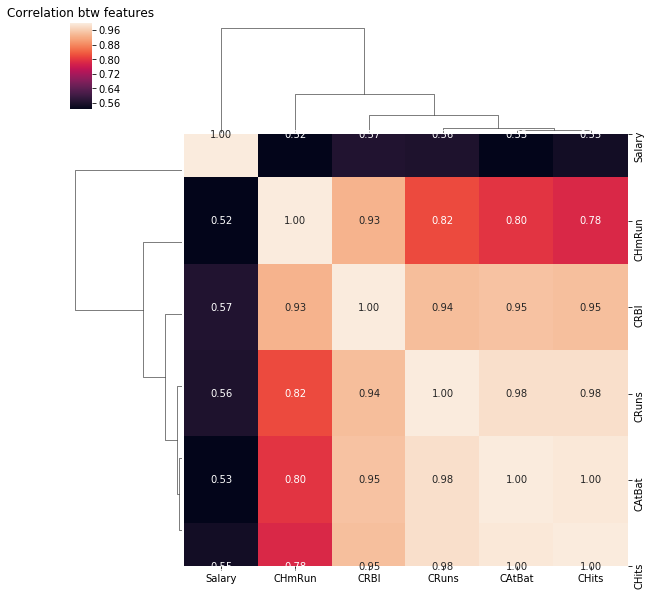

In [14]:
correlation_matrix = df.corr().round(2)
threshold=0.75
filtre=np.abs(correlation_matrix['Salary']) > 0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

Missing values visualization:

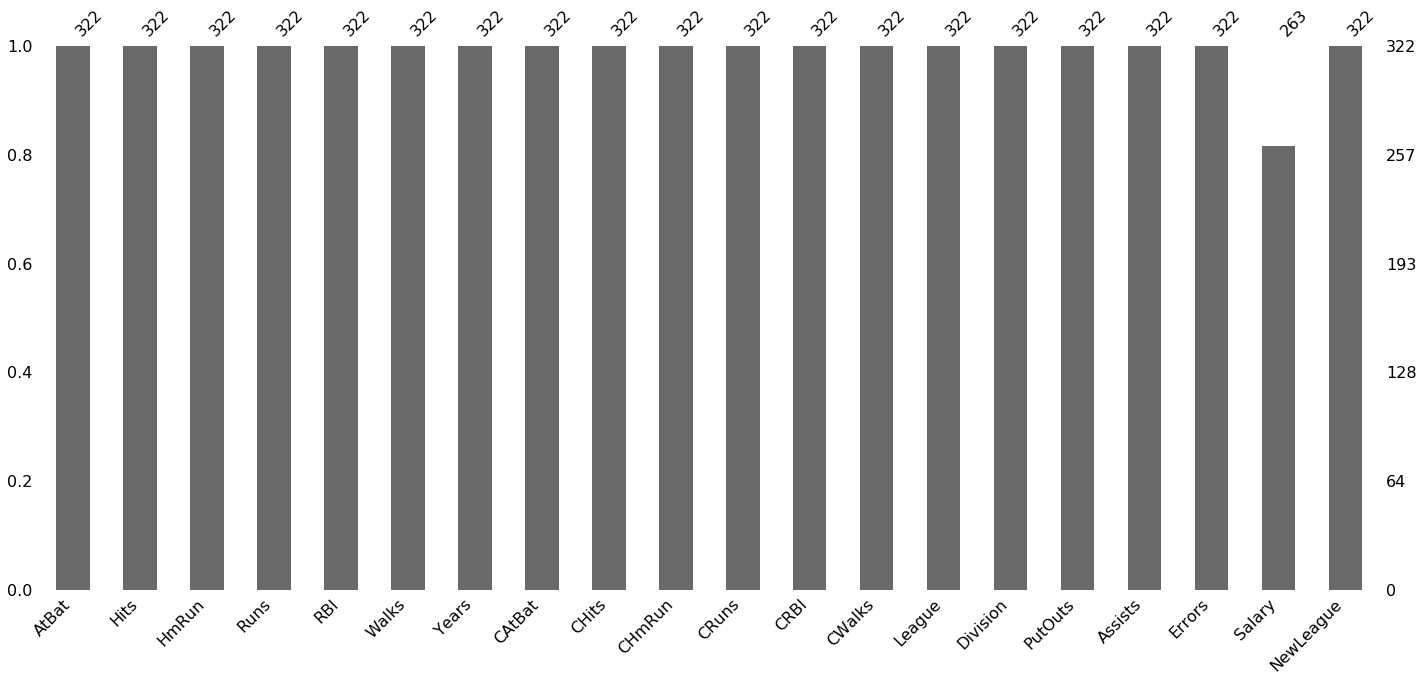

In [16]:
import missingno as msno
msno.bar(df);

# DATA PREPROCESSING

We will consider some options for Missing Values.

###  First Option
This method is drop all NaN values.

In [17]:
df1=df.copy()
df1=df1.dropna()
df1.shape

(263, 20)

Then, convert categorical variable into dummy/indicator variables with 'drop_first = True'. This is for Dummy trap.

In [18]:
df1=pd.get_dummies(df1,columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


## Outlier Detection

Using LOF(Local Outliers Factor) method.

In [19]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df1)
df1_scores=clf.negative_outlier_factor_
df1_scores= np.sort(df1_scores)
df1_scores[0:20]

array([-6.22764656, -4.12325749, -3.14372723, -2.46482586, -2.37903838,
       -1.93271815, -1.92868899, -1.90888428, -1.6775256 , -1.66536304,
       -1.62626849, -1.48361164, -1.48216262, -1.44345727, -1.43603775,
       -1.42239393, -1.40734739, -1.38353101, -1.37252134, -1.3532077 ])

And show all outliers with boxplot.

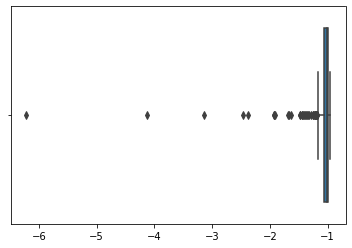

In [20]:
sns.boxplot(df1_scores);

Give threshold for LOF.

In [21]:
threshold=np.sort(df1_scores)[10]
print(threshold)
df1=df1.loc[df1_scores > threshold]
df1=df1.reset_index(drop=True)

-1.6262684891613268


In [22]:
df1.shape

(252, 20)

## Standardization

This is first option with using drop method.

In [23]:
df1_X=df1.drop(["Salary","League_N","Division_W","NewLeague_N"], axis=1)
df1_X.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,418,113,13,48,61,47,4,1512,392,41,205,204,203,211,11,7
1,239,60,0,30,11,22,6,1941,510,4,309,103,207,121,151,6


In [24]:
from sklearn.preprocessing import StandardScaler
scaled_cols=StandardScaler().fit_transform(df1_X)



scaled_cols=pd.DataFrame(scaled_cols, columns=df1_X.columns)
scaled_cols.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,0.090539,0.107178,0.148180,-0.276818,0.358318,0.262692,-0.691613,-0.501375,-0.510527,-0.345307,-0.474096,-0.391453,-0.218089,-0.278876,-0.735818,-0.226449
1,-1.122784,-1.066159,-1.331817,-0.984624,-1.568616,-0.890591,-0.274160,-0.314229,-0.329185,-0.797188,-0.160631,-0.703468,-0.202945,-0.601509,0.237365,-0.379851
2,-1.414253,-1.442513,-0.534895,-1.023947,-0.951997,-0.521540,1.186924,0.248517,0.154905,-0.406372,0.041312,-0.125777,-0.085577,-0.748486,-0.499473,-0.073048
3,1.107291,1.103408,0.945102,1.335406,0.897860,1.462107,1.604377,2.358598,2.380183,1.315658,2.057731,2.045972,1.784734,-0.658866,1.203597,0.233754
4,-1.454923,-1.376097,-1.104125,-1.220559,-1.684232,-1.213510,-0.482887,-0.952009,-0.956197,-0.784975,-0.896067,-0.950609,-0.839002,-0.669620,0.418099,1.154161


In [25]:
cat_df1=df1.loc[:, "League_N":"NewLeague_N"]
cat_df1.head()

,League_N,Division_W,NewLeague_N
0,1,0,1
1,0,0,0
2,1,0,1
3,1,1,1
4,0,1,0


In [29]:
Salary=pd.DataFrame(df1["Salary"])
Salary.head()

,Salary
0,550.0
1,700.0
2,240.0
3,775.0
4,175.0


Concatination for all prepared data frames:

In [30]:
df2=pd.concat([Salary,scaled_cols, cat_df1], axis=1)
df2.head(2)

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,550.0,0.090539,0.107178,0.148180,-0.276818,0.358318,0.262692,-0.691613,-0.501375,-0.510527,-0.345307,-0.474096,-0.391453,-0.218089,-0.278876,-0.735818,-0.226449,1,0,1
1,700.0,-1.122784,-1.066159,-1.331817,-0.984624,-1.568616,-0.890591,-0.274160,-0.314229,-0.329185,-0.797188,-0.160631,-0.703468,-0.202945,-0.601509,0.237365,-0.379851,0,0,0


In [20]:
df2.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,550.0,0.090539,0.107178,0.148180,-0.276818,0.358318,0.262692,-0.691613,-0.501375,-0.510527,-0.345307,-0.474096,-0.391453,-0.218089,-0.278876,-0.735818,-0.226449,1,0,1
1,700.0,-1.122784,-1.066159,-1.331817,-0.984624,-1.568616,-0.890591,-0.274160,-0.314229,-0.329185,-0.797188,-0.160631,-0.703468,-0.202945,-0.601509,0.237365,-0.379851,0,0,0
2,240.0,-1.414253,-1.442513,-0.534895,-1.023947,-0.951997,-0.521540,1.186924,0.248517,0.154905,-0.406372,0.041312,-0.125777,-0.085577,-0.748486,-0.499473,-0.073048,1,0,1
3,775.0,1.107291,1.103408,0.945102,1.335406,0.897860,1.462107,1.604377,2.358598,2.380183,1.315658,2.057731,2.045972,1.784734,-0.658866,1.203597,0.233754,1,1,1
4,175.0,-1.454923,-1.376097,-1.104125,-1.220559,-1.684232,-1.213510,-0.482887,-0.952009,-0.956197,-0.784975,-0.896067,-0.950609,-0.839002,-0.669620,0.418099,1.154161,0,1,0


### Second Option
This is second option and method is fill NA values with mean.

In [31]:
df5=df.copy()

In [32]:
df5.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


Lets take group between 'League','Division', 'Year_lab' features and use 'mean' aggrigation fonksiyon for 'Salary' column.

In [33]:
df5['Year_lab'] = pd.cut(x=df['Years'], bins=[0, 3, 6, 10, 15, 19, 24])
df5.groupby(['League','Division', 'Year_lab']).agg({'Salary':'mean'})

Salary
League Division Year_lab            
A      E        (0, 3]    112.500000
                (3, 6]    655.568182
                (6, 10]   852.738125
                (10, 15]  816.311353
                (15, 19]  665.416750
                (19, 24]         NaN
       W        (0, 3]    153.613636
                (3, 6]    401.360000
                (6, 10]   633.958375
                (10, 15]  835.250000
                (15, 19]  479.000000
                (19, 24]  487.500000
N      E        (0, 3]    248.520813
                (3, 6]    501.191650
                (6, 10]   824.226143
                (10, 15]  894.322667
                (15, 19]  662.500000
                (19, 24]         NaN
       W        (0, 3]    191.766667
                (3, 6]    458.333333
                (6, 10]   563.229188
                (10, 15]  721.894000
                (15, 19]  760.833250
                (19, 24]  475.000000

Let's make assignments to NaN values according to the above grouping.

In [34]:
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'E') & (df5['Years'] <= 3), "Salary"] = 112
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'E') & (df5['Years'] > 3) & (df5['Years'] <= 6), "Salary"] = 656
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'E') & (df5['Years'] > 6) & (df5['Years'] <= 10), "Salary"] = 853
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'E') & (df5['Years'] > 10) & (df5['Years'] <= 15), "Salary"] = 816
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'E') & (df5['Years'] > 15) & (df5['Years'] <= 19), "Salary"] = 665

df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'W') & (df5['Years'] <= 3), "Salary"] = 154
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'W') & (df5['Years'] > 3) & (df5['Years'] <= 6), "Salary"] = 401
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'W') & (df5['Years'] > 6) & (df5['Years'] <= 10), "Salary"] = 634
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'W') & (df5['Years'] > 10) & (df5['Years'] <= 15), "Salary"] = 835
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'W') & (df5['Years'] > 15) & (df5['Years'] <= 19), "Salary"] = 479
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "A") & (df5['Division'] == 'W') & (df5['Years'] > 19), "Salary"] = 487

df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'E') & (df5['Years'] <= 3), "Salary"] = 248
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'E') & (df5['Years'] > 3) & (df5['Years'] <= 6), "Salary"] = 501
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'E') & (df5['Years'] > 6) & (df5['Years'] <= 10), "Salary"] = 824
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'E') & (df5['Years'] > 10) & (df5['Years'] <= 15), "Salary"] = 894
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'E') & (df5['Years'] > 15) & (df5['Years'] <= 19), "Salary"] = 662

df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'W') & (df5['Years'] <= 3), "Salary"] = 192
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'W') & (df5['Years'] > 3) & (df5['Years'] <= 6), "Salary"] = 458
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'W') & (df5['Years'] > 6) & (df5['Years'] <= 10), "Salary"] = 563
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'W') & (df5['Years'] > 10) & (df5['Years'] <= 15), "Salary"] = 722
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'W') & (df5['Years'] > 15) & (df5['Years'] <= 19), "Salary"] = 761
df5.loc[(df["Salary"].isnull()) & (df5["League"] == "N") & (df5['Division'] == 'W') & (df5['Years'] > 19), "Salary"] = 475

In [35]:
df5.shape

(322, 21)

Now using Label Encoder object then apply 'League', 'Division' and 'NewLeague'.

In [36]:
le = LabelEncoder()
df5['League'] = le.fit_transform(df5['League'])
df5['Division'] = le.fit_transform(df5['Division'])
df5['NewLeague'] = le.fit_transform(df5['NewLeague'])

In [37]:
df5.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,293,66,1,30,29,14,1,293,66,1,...,29,14,0,0,446,33,20,112.0,0,"(0, 3]"
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,1,1,632,43,10,475.0,1,"(10, 15]"
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,0,1,880,82,14,480.0,0,"(0, 3]"
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,1,0,200,11,3,500.0,1,"(10, 15]"
4,321,87,10,39,42,30,2,396,101,12,...,46,33,1,0,805,40,4,91.5,1,"(0, 3]"


and for 'Year_lab' column also.

In [38]:
df5['Year_lab'] = le.fit_transform(df5['Year_lab'])

In [39]:
df5.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,293,66,1,30,29,14,1,293,66,1,...,29,14,0,0,446,33,20,112.0,0,0
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,1,1,632,43,10,475.0,1,3


In [40]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null int32
Division     322 non-null int32
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       322 non-null float64
NewLeague    322 non-null int32
Year_lab     322 non-null int32
dtypes: float64(1), int32(4), int64(16)
memory usage: 47.9 KB


## Normalization

After standartization lets normalize last features.

In [42]:
df5_X= df5.drop(["Salary","League","Division","NewLeague"], axis=1)

scaled_cols5=preprocessing.normalize(df5_X)


scaled_cols5=pd.DataFrame(scaled_cols5, columns=df5_X.columns)
scaled_cols5.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Year_lab
0,0.472401,0.106411,0.001612,0.048369,0.046756,0.022572,0.001612,0.472401,0.106411,0.001612,0.048369,0.046756,0.022572,0.719082,0.053206,0.032246,0.000000
1,0.085657,0.022026,0.001903,0.006526,0.010333,0.010605,0.003807,0.937879,0.227060,0.018763,0.087289,0.112578,0.101973,0.171858,0.011693,0.002719,0.000816
2,0.237036,0.064331,0.008907,0.032660,0.035630,0.037609,0.001485,0.803645,0.226149,0.031176,0.110848,0.131631,0.130147,0.435473,0.040578,0.006928,0.000000
3,0.082624,0.023488,0.003332,0.010828,0.012993,0.006163,0.001832,0.937518,0.262365,0.037481,0.137929,0.139595,0.058970,0.033316,0.001832,0.000500,0.000500
4,0.331579,0.089867,0.010330,0.040285,0.043384,0.030989,0.002066,0.409050,0.104328,0.012395,0.049582,0.047516,0.034088,0.831529,0.041318,0.004132,0.000000


Categorical dataframe:

In [43]:
cat_df5=pd.concat([df5.loc[:,"League":"Division"],df5.loc[:,"NewLeague":"Year_lab"]], axis=1)
cat_df5.head()

,League,Division,NewLeague,Year_lab
0,0,0,0,0
1,1,1,1,3
2,0,1,0,0
3,1,0,1,3
4,1,0,1,0


Concatination for all prepared data frames:

In [44]:
df6= pd.concat([scaled_cols5,cat_df5,df5["Salary"]], axis=1)
df6

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,Year_lab,League,Division,NewLeague,Year_lab,Salary
0,0.472401,0.106411,0.001612,0.048369,0.046756,0.022572,0.001612,0.472401,0.106411,0.001612,...,0.022572,0.719082,0.053206,0.032246,0.000000,0,0,0,0,112.0
1,0.085657,0.022026,0.001903,0.006526,0.010333,0.010605,0.003807,0.937879,0.227060,0.018763,...,0.101973,0.171858,0.011693,0.002719,0.000816,1,1,1,3,475.0
2,0.237036,0.064331,0.008907,0.032660,0.035630,0.037609,0.001485,0.803645,0.226149,0.031176,...,0.130147,0.435473,0.040578,0.006928,0.000000,0,1,0,0,480.0
3,0.082624,0.023488,0.003332,0.010828,0.012993,0.006163,0.001832,0.937518,0.262365,0.037481,...,0.058970,0.033316,0.001832,0.000500,0.000500,1,0,1,3,500.0
4,0.331579,0.089867,0.010330,0.040285,0.043384,0.030989,0.002066,0.409050,0.104328,0.012395,...,0.034088,0.831529,0.041318,0.004132,0.000000,1,0,1,0,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.169544,0.043324,0.002388,0.022174,0.016374,0.012622,0.001706,0.922085,0.274954,0.010916,...,0.047076,0.110869,0.003070,0.001023,0.000341,1,0,1,1,700.0
318,0.083222,0.023004,0.000846,0.012855,0.008457,0.015900,0.002030,0.932185,0.255585,0.006597,...,0.148006,0.052944,0.064446,0.003383,0.000507,0,0,0,3,875.0
319,0.256903,0.068147,0.001623,0.032992,0.023256,0.028124,0.003245,0.919443,0.234188,0.003786,...,0.078964,0.020011,0.061116,0.003786,0.000541,0,1,0,1,385.0
320,0.155442,0.039064,0.002441,0.023059,0.016277,0.021160,0.002170,0.867543,0.232484,0.026314,...,0.090064,0.356458,0.035537,0.003255,0.000543,0,0,0,2,960.0


In [45]:
df6.shape

(322, 22)

### Third Option

This is third option for NaN values considiration. Drop NaN values and outliers like first option and log transformation of the features which have multicorrelation above 0.8 between each other.

In [46]:
df3= df1.copy()
print(df3.shape)
df3.head(2)

(252, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,418,113,13,48,61,47,4,1512,392,41,205,204,203,211,11,7,550.0,1,0,1
1,239,60,0,30,11,22,6,1941,510,4,309,103,207,121,151,6,700.0,0,0,0


In [47]:
# log transform the variables
df3['CRuns'] = np.log(df3['CRuns'])
df3['CHits'] = np.log(df3['CHits'])
df3['CAtBat'] = np.log(df3['CAtBat'])
df3['Years'] = np.log(df3['Years'])
df3['CRBI'] = np.log(df3['CRBI'])
df3['CWalks'] = np.log(df3['CWalks'])

In [48]:
df3_X=df3.drop(["Salary","League_N","Division_W","NewLeague_N"], axis=1)
df3_X.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,418,113,13,48,61,47,1.386294,7.321189,5.971262,41,5.323010,5.318120,5.313206,211,11,7
1,239,60,0,30,11,22,1.791759,7.570959,6.234411,4,5.733341,4.634729,5.332719,121,151,6


In [49]:
df3_X.shape

(252, 16)

In [50]:
Rscaler = RobustScaler().fit(df3_X)
scaled_cols3=Rscaler.transform(df3_X)
scaled_cols3=pd.DataFrame(scaled_cols3, columns=df3_X.columns)
scaled_cols3.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,0.010215,0.112281,0.307692,-0.128205,0.341463,0.294118,-0.442507,-0.167735,-0.180454,0.012987,-0.144456,-0.076897,0.105524,-0.057007,-0.198540,0.0
1,-0.721144,-0.631579,-0.692308,-0.589744,-0.878049,-0.441176,0.000000,0.001753,-0.009482,-0.467532,0.122677,-0.540327,0.118881,-0.484561,0.618978,-0.1
2,-0.896834,-0.870175,-0.153846,-0.615385,-0.487805,-0.205882,0.843826,0.347546,0.303013,-0.051948,0.250438,0.161644,0.214411,-0.679335,0.000000,0.1
3,0.623085,0.743860,0.846154,0.923077,0.682927,1.058824,1.000000,0.968518,0.961483,1.779221,0.915899,0.996325,0.983508,-0.560570,1.430657,0.3
4,-0.921348,-0.828070,-0.538462,-0.743590,-0.951220,-0.647059,-0.198978,-0.947747,-1.055160,-0.454545,-0.892231,-1.557009,-1.023738,-0.574822,0.770803,0.9


Concatination for all prepared data frames:

In [51]:
df4=pd.concat([df3_X,df3.loc[:, "League_N": "NewLeague_N"], df3["Salary"]], axis=1)

In [52]:
df4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N,Salary
0,418,113,13,48,61,47,1.386294,7.321189,5.971262,41,5.323010,5.318120,5.313206,211,11,7,1,0,1,550.0
1,239,60,0,30,11,22,1.791759,7.570959,6.234411,4,5.733341,4.634729,5.332719,121,151,6,0,0,0,700.0
2,196,43,7,29,27,30,2.564949,8.080547,6.715383,36,5.929589,5.669881,5.472271,80,45,8,1,0,1,240.0
3,568,158,20,89,75,73,2.708050,8.995661,7.728856,177,6.951772,6.900731,6.595781,105,290,10,1,1,1,775.0
4,190,46,2,24,8,15,1.609438,6.171701,4.624973,5,4.174387,3.135494,3.663562,102,177,16,0,1,0,175.0


In [53]:
scaled_cols3.shape

(252, 16)

In [54]:
cat_df3=df3.loc[:, "League_N":"NewLeague_N"]
cat_df3.head()

,League_N,Division_W,NewLeague_N
0,1,0,1
1,0,0,0
2,1,0,1
3,1,1,1
4,0,1,0


In [55]:
df4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N,Salary
0,418,113,13,48,61,47,1.386294,7.321189,5.971262,41,5.323010,5.318120,5.313206,211,11,7,1,0,1,550.0
1,239,60,0,30,11,22,1.791759,7.570959,6.234411,4,5.733341,4.634729,5.332719,121,151,6,0,0,0,700.0
2,196,43,7,29,27,30,2.564949,8.080547,6.715383,36,5.929589,5.669881,5.472271,80,45,8,1,0,1,240.0
3,568,158,20,89,75,73,2.708050,8.995661,7.728856,177,6.951772,6.900731,6.595781,105,290,10,1,1,1,775.0
4,190,46,2,24,8,15,1.609438,6.171701,4.624973,5,4.174387,3.135494,3.663562,102,177,16,0,1,0,175.0


### Fourth Option
This is fourth option for NaN values and method with mean.

In [56]:
df7=df.copy()

In [57]:
# Filled NaN values with mean

df7.loc[(df7["Salary"].isnull()) & (df7["League"] == "A") & (df7['Division'] == 'E'),"Salary"] = 670.849559
df7.loc[(df7["Salary"].isnull()) & (df7["League"] == "A") & (df7['Division'] == 'W'),"Salary"] = 418.593901
df7.loc[(df7["Salary"].isnull()) & (df7["League"] == "N") & (df7['Division'] == 'E'),"Salary"] = 572.348131
df7.loc[(df7["Salary"].isnull()) & (df7["League"] == "N") & (df7['Division'] == 'W'),"Salary"] = 487.259270

#### Transformation

In [58]:
le = LabelEncoder()
df7['League'] = le.fit_transform(df7['League'])
df7['Division'] = le.fit_transform(df7['Division'])
df7['NewLeague'] = le.fit_transform(df7['NewLeague'])

#### Normalization

In [59]:
df7_X= df7.drop(["Salary","League","Division","NewLeague"], axis=1)

scaled_cols7=preprocessing.normalize(df7_X)


scaled_cols7=pd.DataFrame(scaled_cols7, columns=df7_X.columns)

#### Concatenate

In [62]:
cat_df7=pd.concat([df7.loc[:,"League":"Division"],df7["NewLeague"]], axis=1)
cat_df7.head()

,League,Division,NewLeague
0,0,0,0
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1


In [63]:
df8= pd.concat([scaled_cols7,cat_df7,df7["Salary"]], axis=1)
df8.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
0,0.472401,0.106411,0.001612,0.048369,0.046756,0.022572,0.001612,0.472401,0.106411,0.001612,0.048369,0.046756,0.022572,0.719082,0.053206,0.032246,0,0,0,670.849559
1,0.085657,0.022026,0.001903,0.006526,0.010333,0.010605,0.003807,0.937880,0.227060,0.018763,0.087289,0.112578,0.101973,0.171858,0.011693,0.002719,1,1,1,475.000000
2,0.237036,0.064331,0.008907,0.032660,0.035630,0.037609,0.001485,0.803645,0.226149,0.031176,0.110848,0.131631,0.130147,0.435473,0.040578,0.006928,0,1,0,480.000000
3,0.082624,0.023488,0.003332,0.010828,0.012993,0.006163,0.001832,0.937518,0.262365,0.037481,0.137929,0.139595,0.058970,0.033316,0.001832,0.000500,1,0,1,500.000000
4,0.331579,0.089867,0.010330,0.040285,0.043384,0.030989,0.002066,0.409050,0.104328,0.012395,0.049582,0.047516,0.034088,0.831529,0.041318,0.004132,1,0,1,91.500000


In [64]:
df8.shape

(322, 20)

# MODELING

Let's see different models error accuracy scores according to the DataFrames we created above.

## Linear Regression

In [68]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df2_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df2_linreg_rmse

358.96269658995686

In [69]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df6_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df6_linreg_rmse

295.1339856258489

In [70]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df4_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df4_linreg_rmse

286.77222538245184

In [71]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df8_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df8_linreg_rmse

332.57454029073205

## Ridge Regression

In [72]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df2_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df2_ridreg_rmse 

335.84356228362356

In [73]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df6_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df6_ridreg_rmse 

313.58604723361935

In [74]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df4_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df4_ridreg_rmse 

291.1925398177394

In [75]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df8_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df8_ridreg_rmse 

320.0499539042656

## Lasso Regression

In [76]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df2_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df2_lasreg_rmse

341.5571801043058

In [77]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df6_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df6_lasreg_rmse

287.0495370967287

In [78]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df4_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df4_lasreg_rmse

291.90700495496964

In [79]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df8_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df8_lasreg_rmse

298.8043665250121

## Elastic Net Regression

In [81]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df2_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df2_enet_rmse

312.9755130131042

In [82]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df6_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df6_enet_rmse

331.16385715403896

In [83]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df4_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df4_enet_rmse

309.4278208645854

In [84]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df8_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df8_enet_rmse

351.39651573149763

# MODEL TUNING

Now, consider with model tunning and get accuracy scores.

## Ridge Regression with Model Tuning

In [85]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 
ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df2_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df2_ridge_tuned_rmse

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


357.6534698325276

In [86]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 
ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df6_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df6_ridge_tuned_rmse

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


294.5409815767055

In [87]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 
ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df4_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df4_ridge_tuned_rmse

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


286.82047451978866

In [88]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 
ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df8_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df8_ridge_tuned_rmse

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


315.6851823008528

## Lasso Regression with Model Tuning

In [90]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

#Final Model 
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df2_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df2_lasso_tuned_rmse

354.8324977261552

In [91]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

#Final Model 
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df6_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df6_lasso_tuned_rmse

295.5018394760601

In [92]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

#Final Model 
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df4_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df4_lasso_tuned_rmse

288.5545307338173

In [93]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

#Final Model 
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df8_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df8_lasso_tuned_rmse

313.08500010314657

## Elastic Net Regression with Model Tuning

In [94]:
y=df2["Salary"]
X=df2.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

enet_model = ElasticNet().fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 
enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df2_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df2_enet_tuned_rmse 

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


314.10929811541416

In [95]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

enet_model = ElasticNet().fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 
enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df6_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df6_enet_tuned_rmse 

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


283.5162875579492

In [96]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

enet_model = ElasticNet().fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 
enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df4_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df4_enet_tuned_rmse 

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


302.0497704058101

In [97]:
y=df8["Salary"]
X=df8.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

enet_model = ElasticNet().fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 
enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df8_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df8_enet_tuned_rmse 

C:\Users\gebruiker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


296.0079550997794

Let's put all created models into dataframe shape and watch them.

In [98]:
basicsonuc_df = pd.DataFrame({"CONDITIONS":["df2: drop NA and Outliers, normalized","df6: filled with mean, normalized","df4: drop NA and Outliers, log transformed","df8: filled with mean,normalized"],
                              "LINEAR":[df2_linreg_rmse,df6_linreg_rmse,df4_linreg_rmse,df8_linreg_rmse],
                               "RIDGE":[df2_ridreg_rmse,df6_ridreg_rmse,df4_ridreg_rmse,df8_ridreg_rmse],
                              "RIDGE TUNED":[df2_ridge_tuned_rmse,df6_ridge_tuned_rmse,df4_ridge_tuned_rmse,df8_ridge_tuned_rmse],
                              "LASSO":[df2_lasreg_rmse,df6_lasreg_rmse,df4_lasreg_rmse,df8_lasreg_rmse],
                              "LASSO TUNED":[df2_lasso_tuned_rmse,df6_lasso_tuned_rmse,df4_lasso_tuned_rmse,df8_lasso_tuned_rmse],                              
                              "ELASTIC NET":[df2_enet_rmse,df6_enet_rmse,df4_enet_rmse,df8_enet_rmse],
                              "ELASTIC NET TUNED":[df2_enet_tuned_rmse,df6_enet_tuned_rmse,df4_enet_tuned_rmse,df8_enet_tuned_rmse]
                              })

basicsonuc_df

,CONDITIONS,LINEAR,RIDGE,RIDGE TUNED,LASSO,LASSO TUNED,ELASTIC NET,ELASTIC NET TUNED
0,"df2: drop NA and Outliers, normalized",358.962697,335.843562,357.653470,341.557180,354.832498,312.975513,314.109298
1,"df6: filled with mean, normalized",295.133986,313.586047,294.540982,287.049537,295.501839,331.163857,283.516288
2,"df4: drop NA and Outliers, log transformed",286.772225,291.192540,286.820475,291.907005,288.554531,309.427821,302.049770
3,"df8: filled with mean,normalized",332.574540,320.049954,315.685182,298.804367,313.085000,351.396516,296.007955


# REPORTING

Bu çalışmadaki amaç, Hitters veri seti için doğrusal regresyon modelleri kurup farklı ön işlemelerden geçmiş 4 veri setindeki hata skorlarını minimize etmektir. Yapılan çalışmalar şu şekildedir :

#### **1)** Hitters Veri Seti okundu.
#### **2)** Keşifçi Veri Analizi ile:
* veri setinin yapısal bilgilerine bakıldı.
* veri setindeki değişkenlerin tiplerine bakıldı.
* veri setinin boyut bilgisine erişildi.
* veri setindeki hangi değişkenden kaç tane eksik gözlem olduğu bilgisine erişildi. Sadece bağımlı değişkenolan "Salary" de 59 adet eksik gözlem olduğu gözlendi.
* veri setinin betimsel istatistiklerine bakıldı.

#### **3)** Veri Ön İşleme kısmında:
* **df2 için:**NA değerleri drop edildi, Outlier'lar LOF ile tesipt edildi ve drop edildi. Dummy değişkenler oluşturuldu. X değişkenleri normalize edildi.
* **df6 için:**NA değerleri yaş, lig ve division değişkenlerindeki "Salary" ortalamalarına bakılarak dolduruldu, Dummy değişkenler oluşturuldu. X değişkenlerin normalize edildi.
* **df4 için:**NA değerleri ve LOF ile tespit edilen outlierlar drop edildi, aralarında %80'den fazla korelasyon olan değişkenlere log transformation uygulandı.Dummy değişkenler oluşturuldu. Tüm x değişkenleri Robust scaler ile aynı range'e getirildi.
* **df8 için:**NA değerleri lig ve division değişkenlerindeki "Salary" ortalamalarına bakılarak dolduruldu,Dummy değişkenler oluşturuldu. X değişkenlerin normalize edildi.

#### **4)** Model Kurma aşamasında:

Doğrusal, Ridge, Lasso, ElasticNet makine öğrenmesi modelleri uygulanarak, gerçek değerler ile tahmin edilen değerler arasındaki farkı temsil eden **RMSE** değerleri hesaplandı. Daha sonra Ridge, Lasso ve ElasticNet için hiperparametre optimizasyonları uygulanarak hata değerinin daha da düşürülmesi için çalışıldı. 

#### **5)** Sonuç

Elastic Net Hiperparametre optimizasyonu sonucunda oluşturulan model, df6 Data Frame'ine uygulandığında en düşük RMSE elde edildi.(283)

# REPORTING

The aim of this study is to set up linear regression models for the Hitters data set and minimize error scores in 4 data sets that have undergone different preprocessing. 

The studies conducted are as follows:

#### ** 1) ** Hitters Data Set was read.
#### ** 2) ** With Exploratory Data Analysis:
* Structural information of the dataset was checked.
* Types of variables in data set were examined.
* The size information of the data set has been accessed.
* The number of missing observations from which variable in the data set was accessed. It was observed that there were 59 missing observations only in "Salary" which was dependent variable.
* Descriptive statistics of the data set were examined.

#### ** 3) ** In Data PreProcessing:
* ** For df2: ** NaN values are dropped, Outliers are detected by LOF and dropped. Dummy variables were created. The X variables were normalized.
* ** For df6: ** NaN values were filled by looking at "Salary" averages in age, league and division variables, Dummy variables were created. The X variables were normalized.
* ** For df4: ** NaN values and outlier detected by LOF were dropped, log transformation was applied to variables with more than 80% correlation. Dummy variables were created. All x variables were brought to the same range as Robust scaler.
* ** For df8: ** NaN values were filled by looking at "Salary" averages in league and division variables, Dummy variables were created. The X variables were normalized.

#### ** 4) ** During the Model Building phase:

Using the Linear, Ridge, Lasso, ElasticNet machine learning models, ** RMSE ** values representing the difference between actual values and predicted values were calculated. Later, hyperparameter optimizations were applied for Ridge, Lasso and ElasticNet to further reduce the error value.


## Conclusion

When the model created as a result of Elastic Net Hyperparameter optimization was applied to the df6 Data Frame, the lowest RMSE was obtained. (283)